In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [46]:
data = pd.read_csv('wine-clustering.csv')

In [47]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [153]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
#from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [154]:
report_data = ProfileReport(data)
report_data.to_file(output_file = 'rapport.html')

In [155]:
import plotly.express as px
fig = px.scatter_3d(data, x='Flavanoids', y='Color_Intensity', z='OD280', 
                    color='Color_Intensity')
fig.show()

In [156]:
import plotly.express as px
fig = px.scatter_3d(data, x='Flavanoids', y='Total_Phenols', z='Proline', 
                    color='Flavanoids')
fig.show()

In [157]:
import plotly.express as px
fig = px.scatter_3d(data, x='Alcohol', y='OD280', z='Flavanoids', 
                    color='Proline')
fig.show()

In [228]:
data.head(1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [229]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

Alcohol // OD280

In [230]:
X = data.iloc[:, [6, 9]].values

In [231]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [232]:
# Using the elbow method to find the optimal number of clusters
dbscan=DBSCAN(eps=2,min_samples=3)

In [233]:
model=dbscan.fit(X)

In [234]:
labels=model.labels_

In [235]:
#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

In [236]:
sample_cores[dbscan.core_sample_indices_]=True

In [237]:
#Calculating the number of clusters
n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [241]:
print(metrics.silhouette_score(X,labels))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

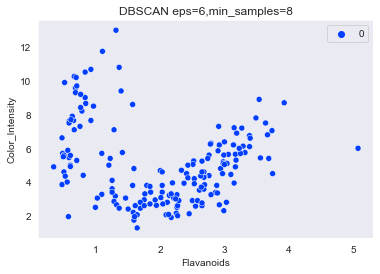

In [202]:
#Visualisation
#sns.set_style(style= 'dark')
sns.scatterplot(x= data['Flavanoids'], y=data['Color_Intensity'], hue = labels, palette = 'bright')#, hue = labels, palette = 'bright'
plt.title('DBSCAN eps=6,min_samples=8')
plt.show()

### Clustering avec PCA

In [190]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [191]:
pca = PCA(n_components = 2)

In [193]:
cluster_pca = pca.fit_transform(data)

In [195]:
print('nos deux composants peuvent expliquer {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

nos deux composants peuvent expliquer 99.98%


In [204]:
pca_df = pd.DataFrame(cluster_pca, columns =('component_1', 'component_2'))
pca_df

,component_1,component_2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


<AxesSubplot:xlabel='component_1', ylabel='component_2'>

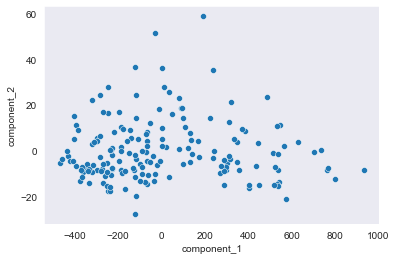

In [206]:
sns.scatterplot(x= pca_df['component_1'], y=pca_df['component_2'])


In [215]:
X_pca = pca_df.iloc[:, [0, 1]].values

In [259]:
dbscan_pca=DBSCAN(eps=48,min_samples=3)

In [260]:
model_pca=dbscan_pca.fit(X_pca)

In [261]:
labels_pca=model_pca.labels_

In [262]:
sample_cores_pca =np.zeros_like(labels_pca,dtype=bool)

In [263]:
sample_cores_pca[dbscan_pca.core_sample_indices_]=True

In [264]:
#Calculating the number of clusters
n_clusters_pca =len(set(labels_pca))- (1 if -1 in labels_pca else 0)

In [265]:
print(metrics.silhouette_score(X_pca,labels_pca))

0.5615978759137168


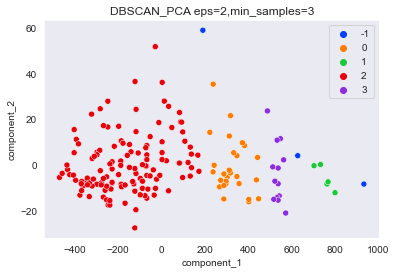

In [266]:
sns.scatterplot(x= pca_df['component_1'], y= pca_df['component_2'], hue = labels_pca, palette = 'bright')#, hue = labels, palette = 'bright'
plt.title('DBSCAN_PCA eps=2,min_samples=3')
plt.show()

In [176]:
x = data.iloc[:,:-1]

In [177]:
db = DBSCAN(eps=1, min_samples=3).fit(x)

In [184]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances,indies = nbrs.kneighbors(x)

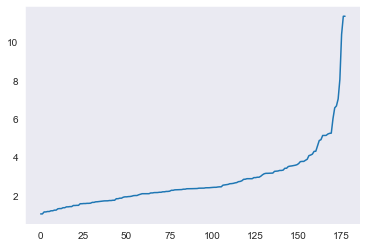

In [185]:
distances = np.sort(distances, axis= 0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
sns.scatterplot(x=)